## Imports

In [1]:
#pip install import-ipynb
#!pip install dill


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation.IPython_display import display_animation
# import gym
import scipy.stats as stats
from scipy.stats import norm
from collections import namedtuple
import statistics
import time
import os
from collections import deque
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

import yfinance as yf
import datetime as dt

import pickle
import dill


##Importing environment classes

import import_ipynb
import Generate_Data
import Environment

/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

## Loading Existing Models

Episode 0/1000, Total Reward: -37.32038052747368, P&L: 9.701728820800781, Std Dev P&L: [nan]
Episode 100/1000, Total Reward: -18.316179495485024, P&L: 17.091751098632812, Std Dev P&L: [107.58684589207759]
Episode 200/1000, Total Reward: -17.086368306430508, P&L: -23.67563247680664, Std Dev P&L: [128.45796997236786]
Episode 300/1000, Total Reward: -54.47890026027371, P&L: -66.29772186279297, Std Dev P&L: [98.74640394082776]
Episode 400/1000, Total Reward: 46.63691625330062, P&L: -25.99782943725586, Std Dev P&L: [118.49573377790277]
Episode 500/1000, Total Reward: 41.20846671663431, P&L: -11.913061141967773, Std Dev P&L: [137.80903536971164]
Episode 600/1000, Total Reward: -364.3115980227959, P&L: 227.52838134765625, Std Dev P&L: [93.03001119338178]
Episode 700/1000, Total Reward: 41.52573142854604, P&L: -0.2772331237792969, Std Dev P&L: [125.98063031036762]
Episode 800/1000, Total Reward: -29.73367815782504, P&L: 10.163688659667969, Std Dev P&L: [56.95612238050706]
Episode 900/1000, Tot

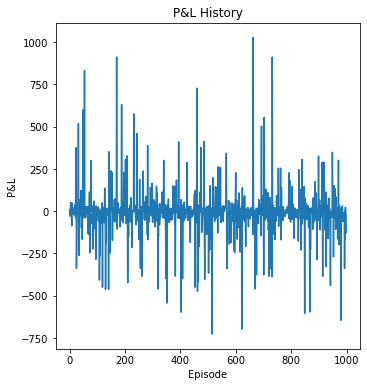

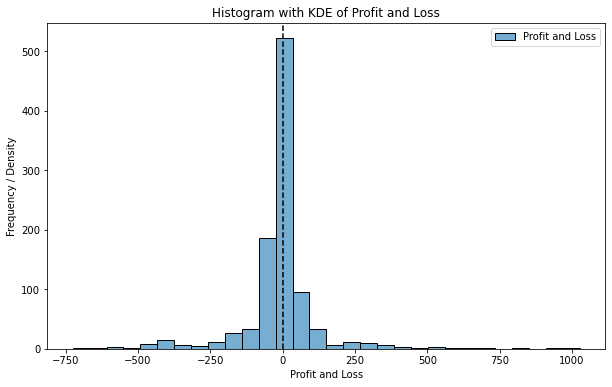

In [3]:
import Delta_Baseline

# Load the agent using dill
with open("models/trained_delta_agent.pkl", "rb") as f:
    delta_agent = dill.load(f)

Episode 0/1000, Total Reward: 3.218013520750397, P&L: -29.21428680419922, Std Dev P&L: [nan]
Episode 100/1000, Total Reward: 371.1656440243483, P&L: 459.80224609375, Std Dev P&L: [131.02175565837152]


<string>:85: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)


Episode 200/1000, Total Reward: -19.319471804761534, P&L: 0.8316993713378906, Std Dev P&L: [166.3196831388693]
Episode 300/1000, Total Reward: 301.42468028814403, P&L: -133.05091857910156, Std Dev P&L: [84.87761147540584]
Episode 400/1000, Total Reward: 26.877963103165108, P&L: 18.514060974121094, Std Dev P&L: [185.56297782314155]
Episode 500/1000, Total Reward: 16.252576794749846, P&L: 33.39385986328125, Std Dev P&L: [99.11944207818517]
Episode 600/1000, Total Reward: -21.535235965832015, P&L: -1.3269424438476562, Std Dev P&L: [159.97725674623388]
Episode 700/1000, Total Reward: -140.8734864396374, P&L: 54.741668701171875, Std Dev P&L: [66.80929395299762]
Episode 800/1000, Total Reward: -227.95627250837285, P&L: -71.88644409179688, Std Dev P&L: [99.32197138996318]
Episode 900/1000, Total Reward: 864.6324085386374, P&L: 21.69342041015625, Std Dev P&L: [162.0166880426827]


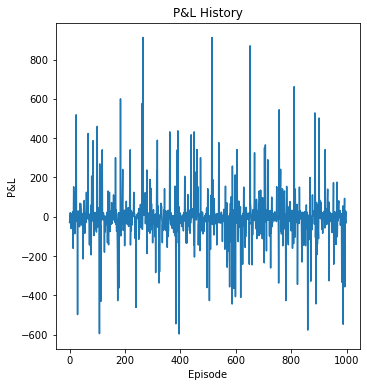

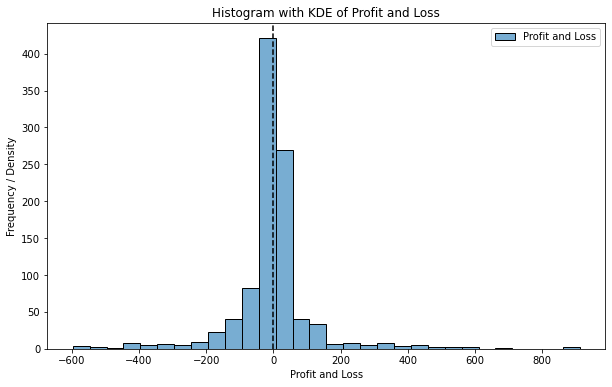

In [4]:
import DQN

# Load the agent using dill
with open("models/dqn_trained_agent.pkl", "rb") as f:
    dqn_agent = dill.load(f)


Episode 0/1000, Total Reward: -20186.880513989792, P&L: 92.31338500976562, Std Dev P&L: [nan]
Episode 100/1000, Total Reward: 0.2706938160705515, P&L: -21.23279571533203, Std Dev P&L: [109.58496791796723]
Episode 200/1000, Total Reward: -764.2380995299684, P&L: -55.817413330078125, Std Dev P&L: [120.68781117408358]
Episode 300/1000, Total Reward: -0.6715036522019993, P&L: 23.132753372192383, Std Dev P&L: [137.31115796772465]
Episode 400/1000, Total Reward: -19017.078093614266, P&L: -146.54541015625, Std Dev P&L: [102.74954413471684]
Episode 500/1000, Total Reward: -1570.4234715558446, P&L: -8.353233337402344, Std Dev P&L: [143.89717452211084]
Episode 600/1000, Total Reward: 83.50306670332994, P&L: -17.758750915527344, Std Dev P&L: [136.72344956278593]
Episode 700/1000, Total Reward: -74465.7673383163, P&L: 530.3756713867188, Std Dev P&L: [141.4340866862203]
Episode 800/1000, Total Reward: -51112.60870313888, P&L: -261.01837158203125, Std Dev P&L: [156.78714776239926]
Episode 900/1000, 

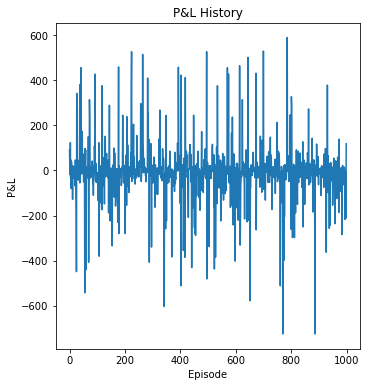

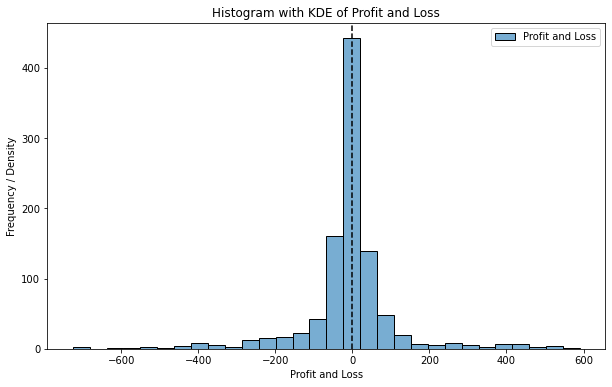

In [5]:
import DDPG

# Load the agent using dill
with open("models/ddpg_agent_full.pkl", "rb") as f:
    ddpg_agent = dill.load(f)

## Testing Suite

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

def test_agent(env, agent, num_episodes, num_steps):
    """
    Test the trained agent in the given environment using unseen data.
    
    Parameters:
    - env: Testing environment with unseen data.
    - agent: The trained agent.
    - num_episodes: Number of episodes to test.
    - num_steps: Number of steps per episode.
    
    Returns:
    - pl_history: List of P&L values for each episode.
    - reward_history: List of total rewards for each episode.
    - std_pl_history: List of standard deviation of P&L over the last 30 episodes, starting from episode 30.
    """
    pl_history = []
    reward_history = []
    std_pl_history = []
    
    # Initialize a list to keep track of the last 30 P&L values
    last_30_pl = []
    
    for episode in range(1, num_episodes + 1):
        state = env.reset()
        
        total_reward = 0
        pl = []

        for step in range(num_steps):
            # Get the action from the trained agent (greedy policy, no exploration)
            action = agent.get_action(state, step=step, episode=episode)

            # Step in the environment
            next_state, reward, done, pv = env.step(action)

            # Accumulate reward
            total_reward += reward
            pl.append(pv)

            if done:
                break
            else:
                state = next_state

        # Calculate total P&L for the episode
        episode_pl = sum(pl)
        pl_history.append(episode_pl)
        reward_history.append(total_reward)
        
        # Update the moving window of the last 30 P&L values
        last_30_pl.append(episode_pl)
        if len(last_30_pl) > 30:
            # Remove the oldest P&L value to maintain the window size
            last_30_pl.pop(0)
        
        # Compute the standard deviation only if we've completed at least 30 episodes
        if episode >= 30:
            std = np.std(last_30_pl)
            std_pl_history.append(std)
        else:
            # Append NaN or any other placeholder for the initial episodes
            std_pl_history.append(np.nan)

        # Optional: Print progress every 100 episodes
        if episode % 100 == 0 or episode == 1:
            print(f"Episode {episode}/{num_episodes} completed.")

    return pl_history, reward_history, std_pl_history


In [7]:
##Getting test datasets
features_test = Generate_Data.features_test
df_stock_test = Generate_Data.df_stock_test
call_options_test = Generate_Data.call_options_test

#Set up your environment with real AAPL stock and option data
env_test = Environment.Environment(
    stock_data=df_stock_test,
    option_data=call_options_test,
    features_data=features_test,
    T=30,
    n_steps=30,
    num_sold_opt=100,
    kappa=0.1,
    alpha=0.001
)

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


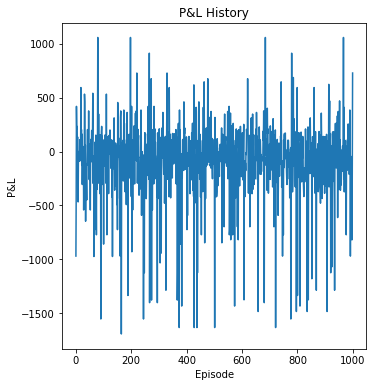

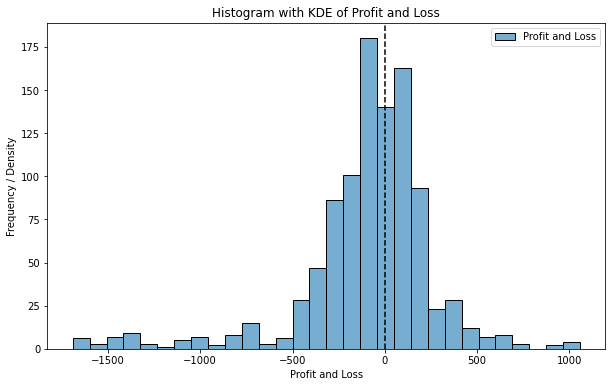

In [8]:
# Test the agent
pl_history_delta, reward_history_delta, std_pl_delta = test_agent(env_test, delta_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_delta)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_delta, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


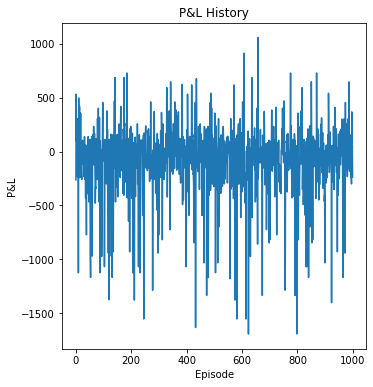

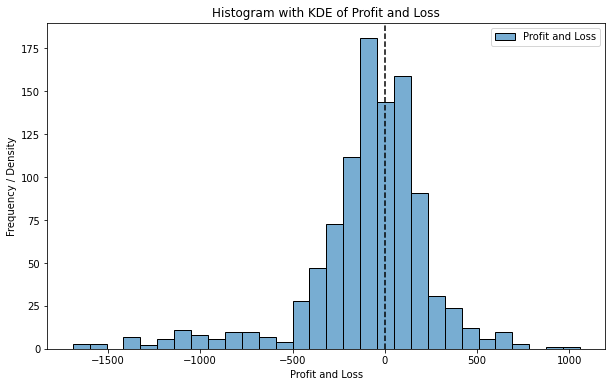

In [9]:
# Test the agent
pl_history_dqn, reward_history_dqn, std_pl_dqn = test_agent(env_test, dqn_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_dqn)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_dqn, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


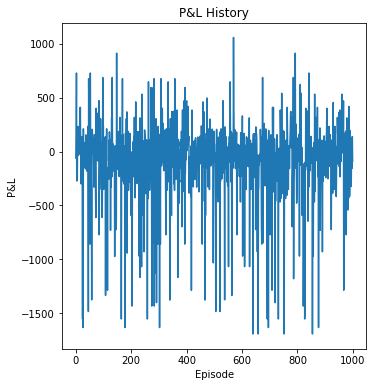

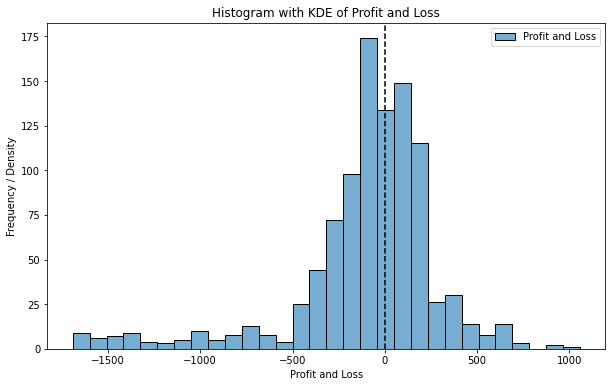

In [10]:
# Test the agent
pl_history_ddpg, reward_history_ddpg, std_pl_ddpg = test_agent(env_test, ddpg_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_ddpg)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

## Combining

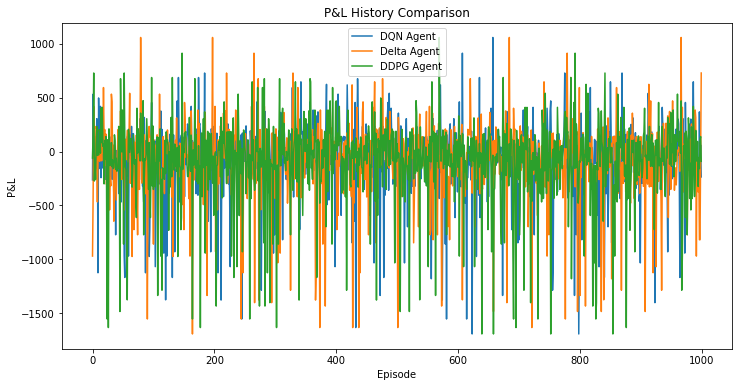

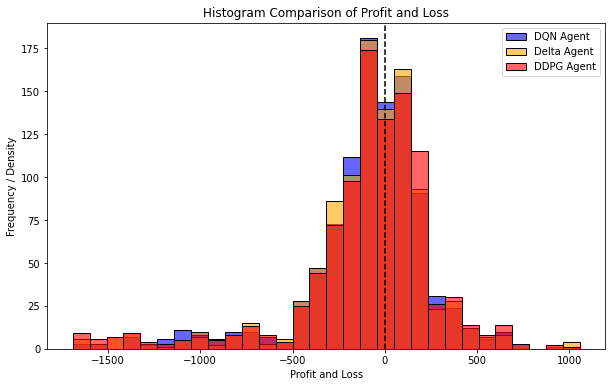

In [11]:
# Plot P&L history comparison
plt.figure(figsize=(12, 6))

# Line plot of P&L histories
plt.plot(pl_history_dqn, label="DQN Agent")
plt.plot(pl_history_delta, label="Delta Agent")
plt.plot(pl_history_ddpg, label="DDPG Agent")

plt.title("P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("P&L")
plt.legend()
plt.show()

# Histogram comparison
plt.figure(figsize=(10, 6))

sns.histplot(pl_history_dqn, kde=False, bins=30, label="DQN Agent", color="blue", alpha=0.6)
sns.histplot(pl_history_delta, kde=False, bins=30, label="Delta Agent", color="orange", alpha=0.6)
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="DDPG Agent", color="red", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram Comparison of Profit and Loss")
plt.legend()
plt.show()

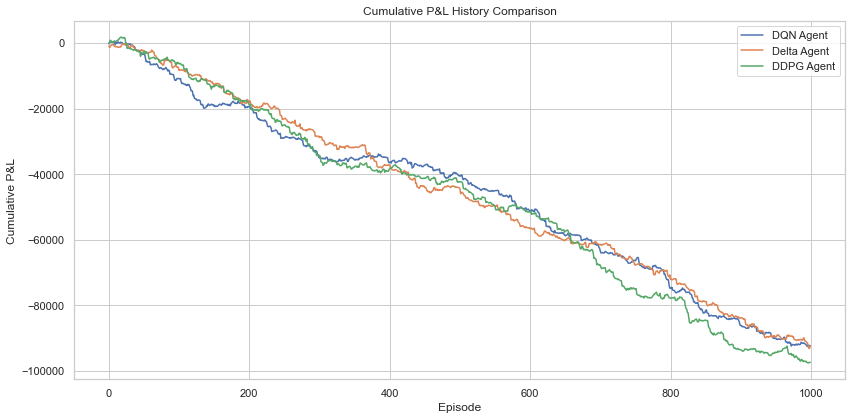

In [12]:
cum_pl_dqn = np.cumsum(pl_history_dqn)
cum_pl_delta = np.cumsum(pl_history_delta)
cum_pl_ddpg = np.cumsum(pl_history_ddpg)

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(cum_pl_dqn, label="DQN Agent")
plt.plot(cum_pl_delta, label="Delta Agent")
plt.plot(cum_pl_ddpg, label="DDPG Agent")

plt.title("Cumulative P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
print(reward_history_ddpg)
print(reward_history_delta)
print(reward_history_dqn)

[-25501.304697143158, -48281.52168730956, -29378.377881342636, -28777.183668300167, -23894.803413214137, -12976.296839176988, -34429.633285142205, -14666.006241017674, -56395.05683315022, -70940.62607785738, -44958.44671669377, -38310.87862222801, -38046.796032087026, -16317.738190266578, -57780.74041847021, -30688.296153301693, -43344.14303162687, -32111.898675771678, -30437.78304894506, -82928.44152833492, -23196.518642404524, -26985.204138632605, -48961.61236026063, -22226.761623408333, -634803.5933097571, -38125.65359728849, -591801.6838913994, -18880.702280101985, -91358.10725173524, -23398.366906420142, -27660.262820347936, -30659.105474404478, -34802.982160527994, -30578.92318469312, -28315.958560717278, -107400.19235514716, -26575.13163503844, -16141.097620896717, -25014.996795529936, -31677.096501373955, -34570.339310884374, -23508.10418680686, -56017.3440930179, -20132.385206529725, -65757.60096186651, -609623.1752638121, -53915.677399965876, -18542.94348132922, -65785.678700

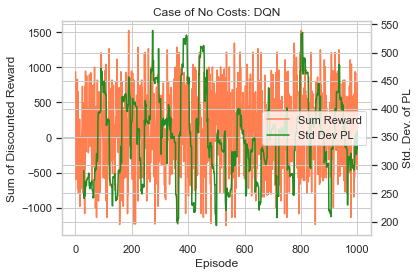

In [17]:
## DELTA
episodes = np.array(list(range(1, len(reward_history_delta) + 1)))

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_delta, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_delta, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()

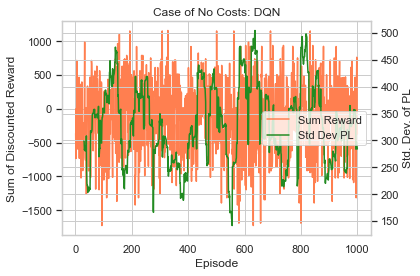

In [18]:
## DQN

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_dqn, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_dqn, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()

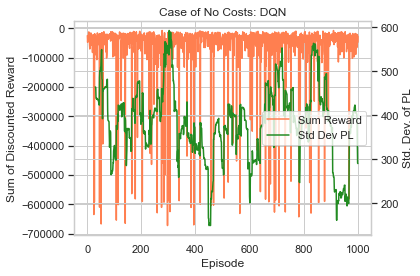

In [19]:
## DDPG

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_ddpg, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_ddpg, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()